In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d pratik2901/multiclass-weather-dataset

 96% 88.0M/91.4M [00:05<00:00, 23.4MB/s]
100% 91.4M/91.4M [00:05<00:00, 18.5MB/s]


In [6]:
!unzip /content/multiclass-weather-dataset.zip -d /content

Archive:  /content/multiclass-weather-dataset.zip
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy1.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy10.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy100.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy101.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy102.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy103.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy104.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy105.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy106.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy107.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy108.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy109.jpg  
  inflating: /content/Multi-class Weather Dataset/Cloudy/cloudy11.jpg  
  inf

# Libraries

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [21]:
dataset = '/content/Multi-class Weather Dataset'

In [22]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [23]:
batch_size = 16
train_generator = datagen.flow_from_directory(
    dataset,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


# Model

In [25]:
num_classes = 4
img_shape = (64, 64, 3)

model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=img_shape))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=num_classes, activation='softmax'))

In [26]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)      

In [28]:
# Train the model
batch_size = 16
epochs = 100
history = model.fit(train_generator, epochs=epochs, batch_size=batch_size, validation_data=val_generator)

Epoch 1/100
57/57 [==============================] - 10s 120ms/step - loss: 1.0336 - accuracy: 0.5483 - val_loss: 1.4933 - val_accuracy: 0.4643
Epoch 2/100
57/57 [==============================] - 6s 97ms/step - loss: 0.6551 - accuracy: 0.7259 - val_loss: 0.7806 - val_accuracy: 0.6741
Epoch 3/100
57/57 [==============================] - 7s 118ms/step - loss: 0.4630 - accuracy: 0.8147 - val_loss: 0.6711 - val_accuracy: 0.7589
Epoch 4/100
57/57 [==============================] - 6s 98ms/step - loss: 0.4499 - accuracy: 0.8224 - val_loss: 0.6153 - val_accuracy: 0.7902
Epoch 5/100
57/57 [==============================] - 7s 120ms/step - loss: 0.4627 - accuracy: 0.8091 - val_loss: 0.6365 - val_accuracy: 0.7009
Epoch 6/100
57/57 [==============================] - 6s 98ms/step - loss: 0.4125 - accuracy: 0.8313 - val_loss: 0.5120 - val_accuracy: 0.8036
Epoch 7/100
57/57 [==============================] - 7s 120ms/step - loss: 0.3721 - accuracy: 0.8668 - val_loss: 0.6122 - val_accuracy: 0.8036
E

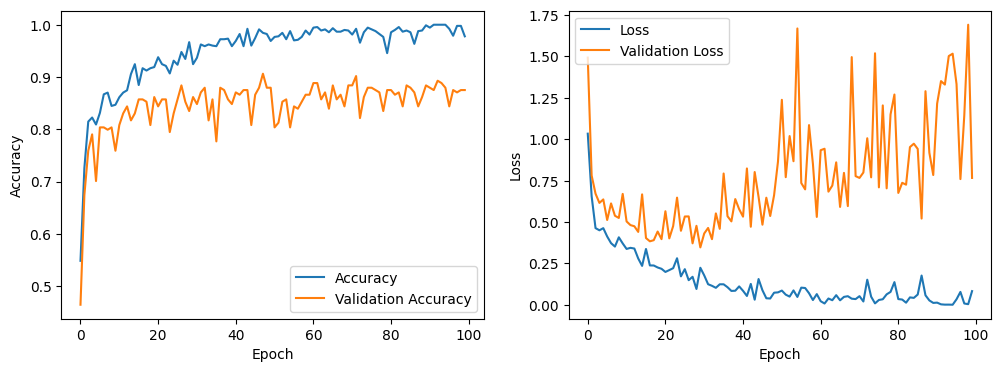

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# Plot the accuracy and loss as subplot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

14/14 [==============================] - 1s 95ms/step


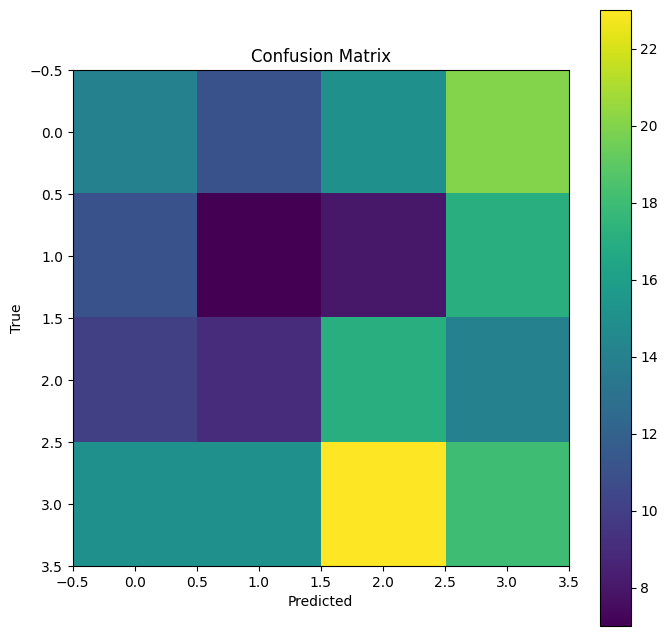

In [30]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(val_generator), axis=1)
y_true = val_generator.classes[val_generator.index_array]

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 8))
plt.imshow(cm)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


In [31]:
model_eval = model.evaluate(val_generator)
print("Loss:", model_eval[0])
print("Accuracy:", model_eval[1])

14/14 [==============================] - 1s 93ms/step - loss: 0.8886 - accuracy: 0.8750
Loss: 0.8885936737060547
Accuracy: 0.875


In [32]:
model.save('/content/drive/MyDrive/weather_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
# tr_acc = history.history['accuracy']
# tr_loss = history.history['loss']
# val_acc = history.history['val_accuracy']
# val_loss = history.history['val_loss']
# index_loss = np.argmin(val_loss)
# val_lowest = val_loss[index_loss]
# index_acc = np.argmax(val_acc)
# acc_highest = val_acc[index_acc]

# Epochs = [i+1 for i in range(len(tr_acc))]
# loss_label = f'best epoch= {str(index_loss + 1)}'
# acc_label = f'best epoch= {str(index_acc + 1)}'

# # Plot training history
# plt.figure(figsize= (20, 8))
# plt.style.use('fivethirtyeight')

# plt.subplot(1, 2, 1)
# plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
# plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
# plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
# plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
# plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()